In [1]:
!nvidia-smi

Sun Apr 14 17:50:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.72                 Driver Version: 536.45       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  | 00000000:01:00.0  On |                  N/A |
| N/A   44C    P8               3W /  95W |    165MiB /  8188MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
# change opencv version to 4.8
# change opencv version to 4.8
!pip uninstall opencv-python opencv-contrib-python
!pip install opencv-python==4.8.0.74
!pip install opencv-contrib-python==4.8.0.74

# Install xarray
!pip install xarray

## pyarrow and numpy
!pip install pyarrow==12.0.0
!pip install numpy==1.23

Found existing installation: opencv-python 4.9.0.80
Uninstalling opencv-python-4.9.0.80:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.9.0.80.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-a7aedf18.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-5b2d853e.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-512f0acb.so.59.37.100
    /usr/local/lib/py

In [2]:
!pip install segment-geospatial

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [11]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

In [20]:
m = leafmap.Map(center=[37.8713, -122.2580], zoom=17,height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[37.8713, -122.258], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [7]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-95.3704, 29.6762, -95.368, 29.6775]

m.user_roi_bounds()
# get_basemaps().keys()

[-122.2666, 37.8685, -122.2537, 37.8742]

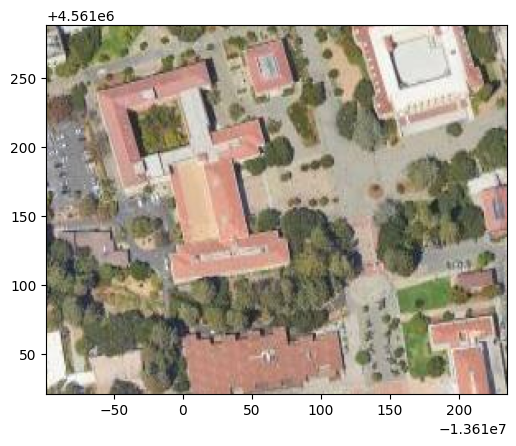

In [22]:
## Download the image of the iou drawn as .tif and show
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

image = "satellite.tif"

with rasterio.open(image) as src:
    fig, ax = plt.subplots()
    rasterio.plot.show(src, ax=ax)

In [14]:
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")
m

Map(bottom=12958659.0, center=[37.8700852792103, -122.26380407810213], controls=(ZoomControl(options=['positio…

## SAM

In [15]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

In [16]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

100%|██████████| 6/6 [00:36<00:00,  6.03s/it]


In [17]:
vector = "segment.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

In [18]:
shapefile = "segment.shp"
sam.tiff_to_vector(mask, shapefile)

In [19]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector(vector, layer_name="Vector", style=style)
m

Map(bottom=12958510.0, center=[37.87135, -122.26015], controls=(ZoomControl(options=['position', 'zoom_in_text…